In [81]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import seaborn as sns

In [82]:
path = r'C:/Users/user/Desktop/VS_studio_projects/data'
data = pd.read_csv(path + '/red_wine_quality_Final.csv', encoding='utf-8', decimal='.', delimiter=',')

display(data.head())

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,NaN,3.51,0.56,9.4,5


In [83]:
print(data.columns)

Index(['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar',
       'chlorides', 'freeSulfurDioxide', 'totalSulfurDioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')


1599


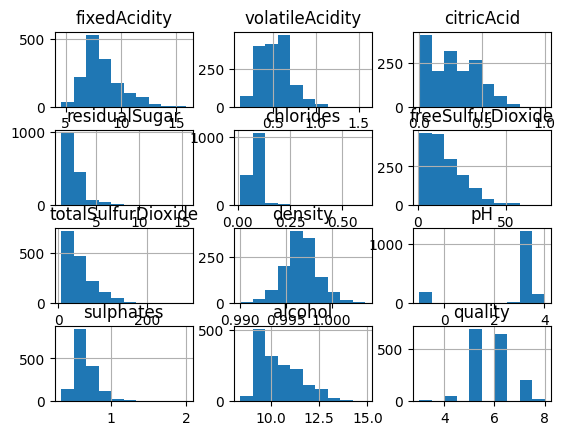

In [84]:
hist=data.hist()

print(len(data))

Check NaN values

In [85]:
print(len(data))
print("missing:", data.isna().sum())

1599
missing: fixedAcidity           56
volatileAcidity        27
citricAcid              0
residualSugar          27
chlorides              27
freeSulfurDioxide       0
totalSulfurDioxide     27
density               334
pH                      0
sulphates              27
alcohol                27
quality                 0
dtype: int64


[[ 1.         -0.2537011   0.67487542  0.11336425  0.10353842 -0.15539572
  -0.10542626  0.66500291 -0.06429664  0.1821378  -0.05855219  0.12802876]
 [-0.2537011   1.         -0.55126588  0.00102015  0.05709389 -0.0076198
   0.08324432  0.02538268  0.02406308 -0.26515252 -0.20132027 -0.38927151]
 [ 0.67487542 -0.55126588  1.          0.14590904  0.19741941 -0.06097813
   0.03402463  0.35865011 -0.05614736  0.30792143  0.11133387  0.22637251]
 [ 0.11336425  0.00102015  0.14590904  1.          0.06102532  0.19206779
   0.20946563  0.34908664 -0.02654358  0.00703181  0.04217195  0.01414215]
 [ 0.10353842  0.05709389  0.19741941  0.06102532  1.          0.00971072
   0.0502456   0.20798148 -0.08715429  0.36135362 -0.22052795 -0.13281364]
 [-0.15539572 -0.0076198  -0.06097813  0.19206779  0.00971072  1.
   0.66672047 -0.00527524  0.05446822  0.055788   -0.06983189 -0.05065606]
 [-0.10542626  0.08324432  0.03402463  0.20946563  0.0502456   0.66672047
   1.          0.09297546  0.01687198  0.

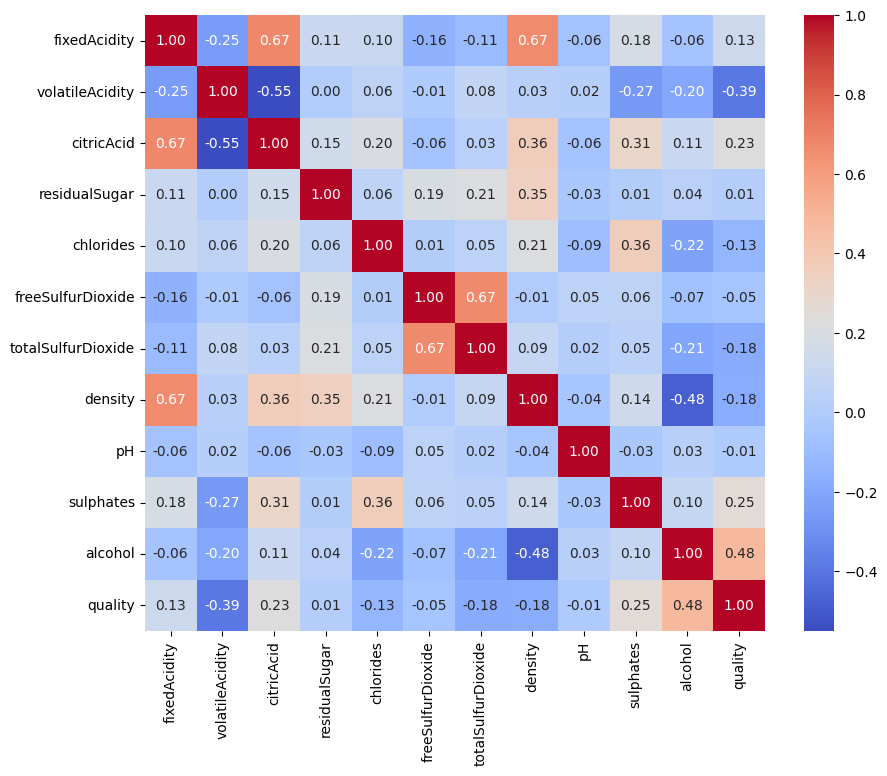

In [86]:
# correlation matrix
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

print(corr.values)

**PCA na datech** <br>
nedava upnlne smysl, jelikoz se nezbavime vysledne dimenzionality (z 11 na 8). takze se da kompletne vynechat

Explained variance by each component: [0.24224692 0.19441489 0.14082333 0.08492563 0.07066134 0.06206498
 0.05197903 0.04495622]
Total explained variance (8 components): 0.8920723501351913
Total lost variance: 0.10792764986480874


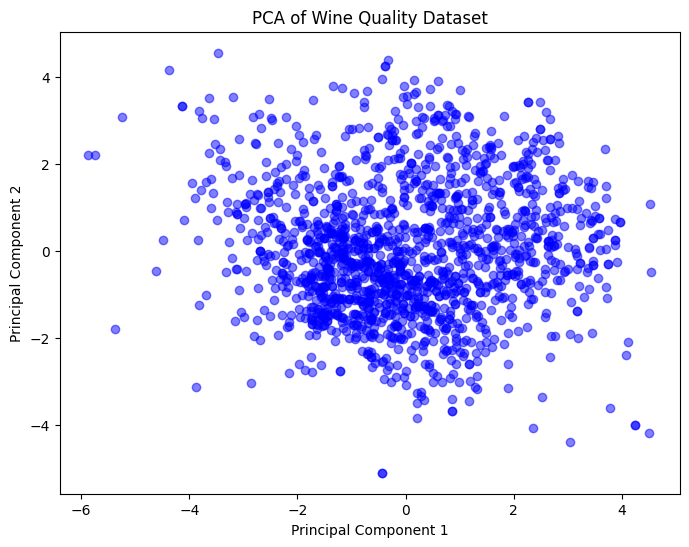

In [94]:


#data = data.fillna(data.mean())

# decorelation dataset
from sklearn.decomposition import PCA   
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))  # Exclude non-numeric columns

pca = PCA(n_components=8) 
data_reduced = pca.fit_transform(data_scaled)

# before PCA
# sns.pairplot(data.select_dtypes(include=[np.number]))  # Exclude non-numeric columns
# plt.suptitle('Pairplot of Wine Quality Dataset', y=1.02) 

plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c='blue', alpha=0.5)
plt.title('PCA of Wine Quality Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# % of lost information with PCA
explained_variance = pca.explained_variance_ratio_ 
print("Explained variance by each component:", explained_variance)
print("Total explained variance (8 components):", np.sum(explained_variance))
print("Total lost variance:", 1 - np.sum(explained_variance))

Feature: fixedAcidity
  Mean: 8.31898898250162
  Median: 7.9
  Standard Deviation: 1.745476574275394
  Min: 4.6
  Max: 15.9
missing: 56
  Number of Outliers: 28


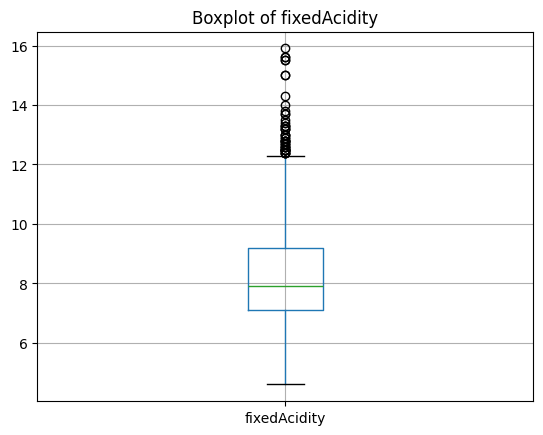

Feature: volatileAcidity
  Mean: 0.5281933842239185
  Median: 0.52
  Standard Deviation: 0.17913020845009253
  Min: 0.12
  Max: 1.58
missing: 27
  Number of Outliers: 48


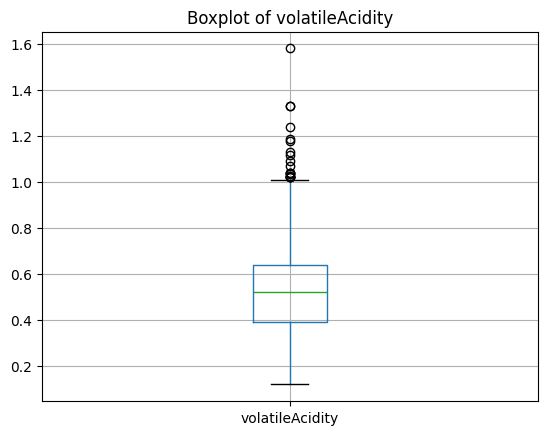

Feature: citricAcid
  Mean: 0.2709756097560976
  Median: 0.26
  Standard Deviation: 0.19480113740531857
  Min: 0.0
  Max: 1.0
missing: 0
  Number of Outliers: 19


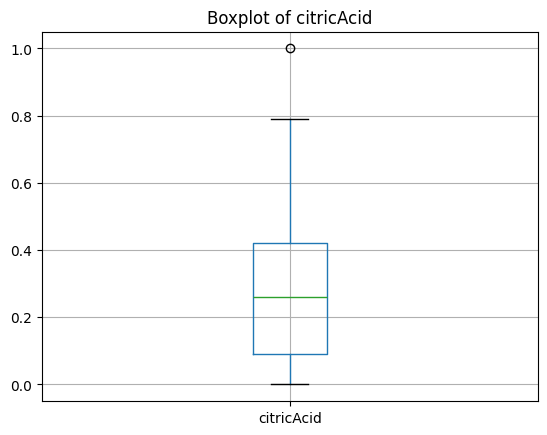

Feature: residualSugar
  Mean: 2.5421437659033077
  Median: 2.2
  Standard Deviation: 1.4183653718772942
  Min: 0.9
  Max: 15.5
missing: 27
  Number of Outliers: 1


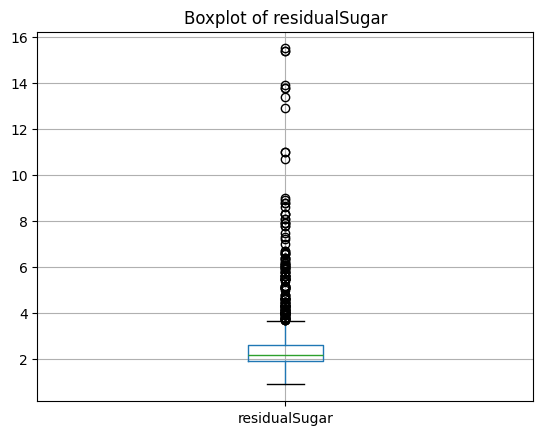

Feature: chlorides
  Mean: 0.08719783715012722
  Median: 0.079
  Standard Deviation: 0.04594243674129356
  Min: 0.012
  Max: 0.611
missing: 27
  Number of Outliers: 153


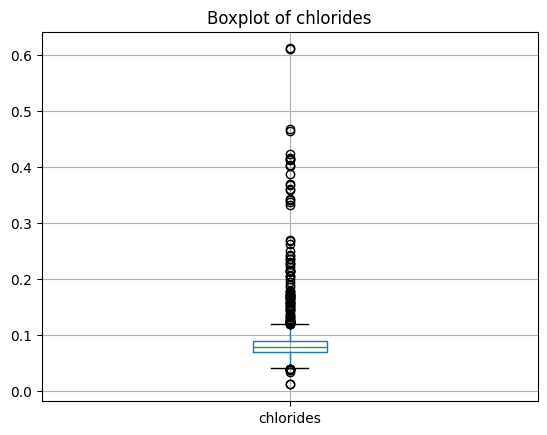

Feature: freeSulfurDioxide
  Mean: 15.874921826141339
  Median: 14.0
  Standard Deviation: 10.460156969809725
  Min: 1.0
  Max: 72.0
missing: 0
  Number of Outliers: 109


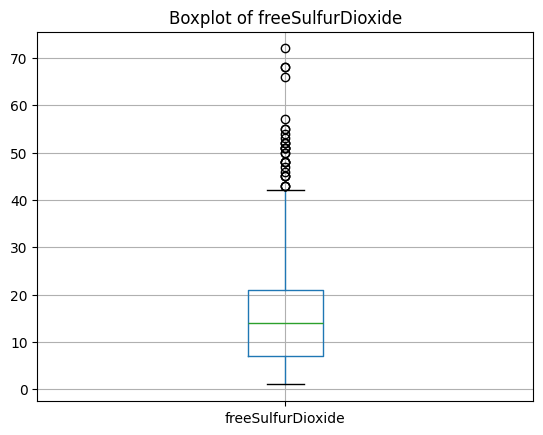

Feature: totalSulfurDioxide
  Mean: 46.44338422391858
  Median: 38.0
  Standard Deviation: 32.797174479647765
  Min: 6.0
  Max: 289.0
missing: 27
  Number of Outliers: 30


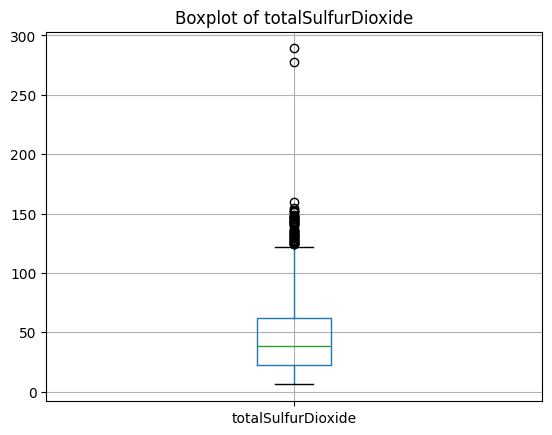

Feature: density
  Mean: 0.9967417944664031
  Median: 0.99672
  Standard Deviation: 0.001879391234793521
  Min: 0.99007
  Max: 1.00369
missing: 334
  Number of Outliers: 54


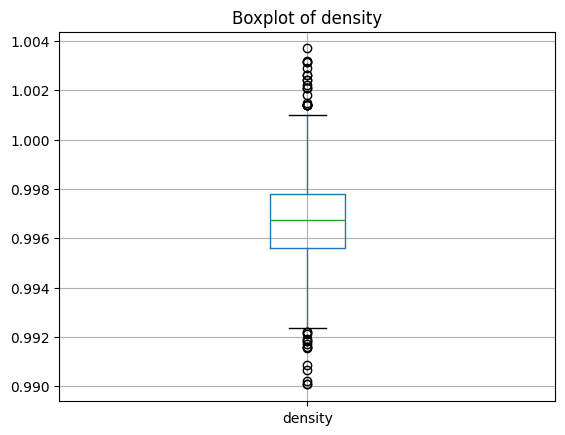

Feature: pH
  Mean: 2.776597873671044
  Median: 3.29
  Standard Deviation: 1.4316199661326916
  Min: -1.0
  Max: 4.01
missing: 0
  Number of Outliers: 35


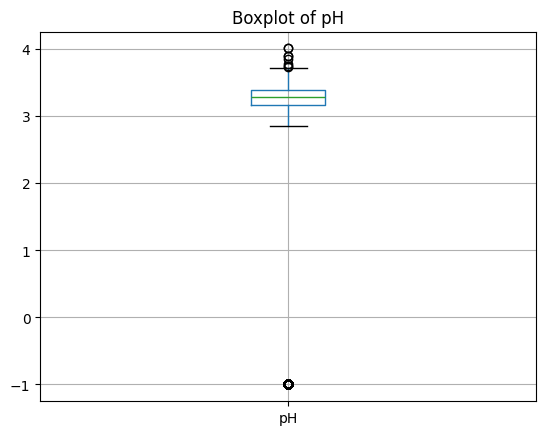

Feature: sulphates
  Mean: 0.6583651399491094
  Median: 0.62
  Standard Deviation: 0.16965779465777814
  Min: 0.33
  Max: 2.0
missing: 27
  Number of Outliers: 207


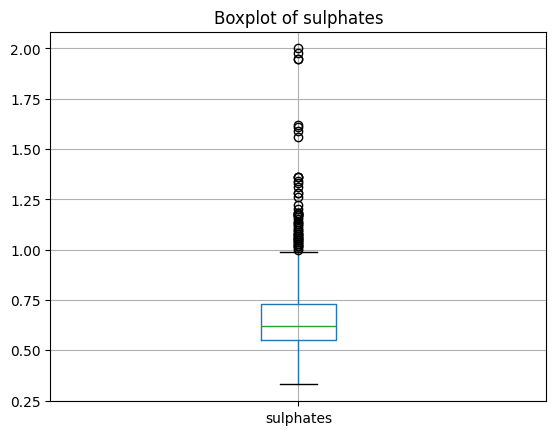

Feature: alcohol
  Mean: 10.425922391857508
  Median: 10.2
  Standard Deviation: 1.0647326071051921
  Min: 8.4
  Max: 14.9
missing: 27
  Number of Outliers: 57


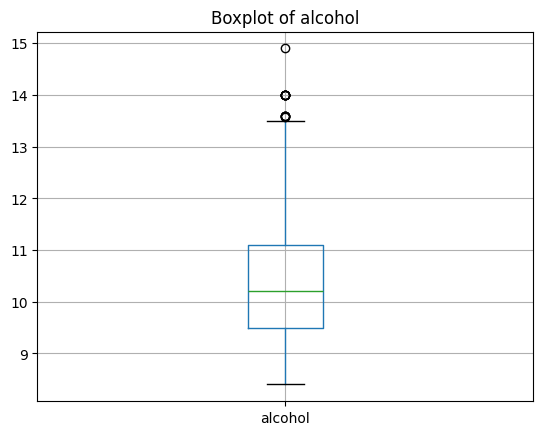

Feature: quality
  Mean: 5.6360225140712945
  Median: 6.0
  Standard Deviation: 0.807569439734705
  Min: 3
  Max: 8
missing: 0
  Number of Outliers: 13


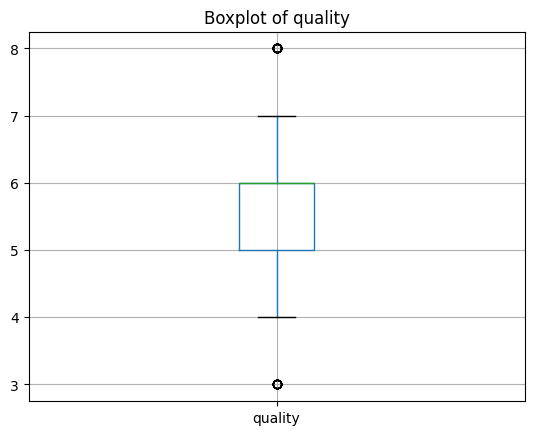

In [88]:
# boxplot for outliers detection

# Describing important features

for column in data.select_dtypes(include=[np.number]).columns:
    print(f"Feature: {column}")
    print(f"  Mean: {data[column].mean()}")
    print(f"  Median: {data[column].median()}")
    print(f"  Standard Deviation: {data[column].std()}")
    print(f"  Min: {data[column].min()}")
    print(f"  Max: {data[column].max()}")
    print("missing:", data[column].isna().sum())


    data.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    print(f"  Number of Outliers: {outliers.shape[0]}")
    plt.show()
    # num of outliers
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    


| Název                    | Význam                                                    | Jednotka               | Typický rozsah       | Interpretace / poznámky                                                     |
| ------------------------ | --------------------------------------------------------- | ---------------------- | -------------------- | --------------------------------------------------------------------------- |
| <code style="color : orange">**fixed acidity** </code>       | Množství **neprchavých kyselin** (hlavně vinná, jablečná) | g/L                    | 4 – 10 (občas až 12) | Vyšší → víno je kyselejší, stabilnější; extrémně vysoké = neobvyklé         |
| **volatile acidity**     | **Prchavé kyseliny**, především kyselina octová           | g/L (acetic acid)      | 0.1 – 1.5            | Vyšší → může znamenat „octový“ zápach, zhoršená kvalita                     |
| **citric acid**          | Kyselina citronová (přirozená i přidaná)                  | g/L                    | 0.0 – 1.0            | Dodává svěžest a chuť; 0 = ploché víno, >0.5 = svěží                        |
| <code style="color : red">**residual sugar**</code>    | **Zbytkový cukr** po fermentaci                           | g/L                    | 0.9 – 15 (běžně <10) | Vyšší → sladší víno; u suchých vín <4                                       |
| <code style="color : orange">**chlorides**  </code>            | **Chloridy** (obsah soli)                                 | g/L (NaCl)             | 0.01 – 0.1           | Vyšší → může kazit chuť; nad 0.2 je už podezřelé                            |
| <code style="color : yellow"> **free sulfur dioxide** </code> | Volný **oxid siřičitý** (SO₂) – chrání víno před oxidací  | mg/L                   | 1 – 50               | Vyšší → lepší stabilita, ale může ovlivnit vůni                             |
| **total sulfur dioxide** | Celkové množství SO₂ (volný + vázaný)                     | mg/L                   | 6 – 250              | Nad 150 už může být na hranici povolených hodnot; silně koreluje s free SO₂ |
| <code style="color : pink"> **density**</code>              | Hustota vína                                              | g/cm³ (nebo ekv. g/mL) | 0.990 – 1.004        | Vyšší hustota → více cukru nebo méně alkoholu                               |
| <code style="color : red"> **pH**</code>                 | Kyselost (negativní log. koncentrace H⁺)                  | bez jednotky           | 2.8 – 4.0            | Nižší pH = kyselejší víno; vyšší pH = plošší chuť, menší stabilita          |
| **sulphates**            | Síranové ionty (SO₄²⁻), indikátor konzervantů             | g/L (K₂SO₄)            | 0.3 – 1.6            | Vyšší → stabilnější, ale někdy „ostrý“ dojem                                |
| **alcohol**              | Obsah alkoholu                                            | % objemu (v/v)         | 8 – 14 %             | Vyšší → plnější chuť; silně koreluje s kvalitou                             |
| **quality**              | Hodnocení kvality vína (panel odborníků)                  | 0–10 (typ. 3–9)        | 3 – 9                | Cílová proměnná, ordinalní (vyšší = lepší)                                  |



fixed acidity - vicero outlieru, kteri nedavaji smysl <br>
residual sugar - neni rozptyl promenne jako u jinych dat <br>
chlorides - nesmyslni outlieri<br>
freeSulfurDioxide - outlieri minmo range, ale nemusi byt nutne zle<br>
density - hodne NaN hodnot, ale mohlo by jit odvodit z jinych promennych <br>
pH - urcite odstranit -1 hodnoty = nesmysl, jinak parametr vypada dobre<br>

In [89]:
# bad values correction
print("missing:", data.isna().sum())

data['fixedAcidity'] = data['fixedAcidity'].apply(lambda x: np.nan if x > 12 else x)
data['chlorides'] = data['chlorides'].apply(lambda x: np.nan if x > 0.13 else x)
data['pH'] = data['pH'].apply(lambda x: np.nan if x < 0 else x)


print("missing:", data.isna().sum())

missing: fixedAcidity           56
volatileAcidity        27
citricAcid              0
residualSugar          27
chlorides              27
freeSulfurDioxide       0
totalSulfurDioxide     27
density               334
pH                      0
sulphates              27
alcohol                27
quality                 0
dtype: int64
missing: fixedAcidity          114
volatileAcidity        27
citricAcid              0
residualSugar          27
chlorides             102
freeSulfurDioxide       0
totalSulfurDioxide     27
density               334
pH                    199
sulphates              27
alcohol                27
quality                 0
dtype: int64


In [90]:
# Imputation rules
# Thresholds:
#  - drop columns with >= 50% missing
#  - for numeric cols with 20% <= missing < 50% use KNN imputer
#  - for numeric cols with < 20% missing fill with median
#  - for non-numeric cols fill with mode

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# configurable thresholds
DROP_COL_THRESHOLD = 0.5   # drop column if >= 50% missing
ADVANCED_IMPUTE_THRESHOLD = 0.2  # use KNN if >=20% and <50%

print("Dataset shape:", data.shape)
missing = data.isna().sum()
missing_perc = missing / len(data)
summary = pd.DataFrame({"missing": missing, "missing_perc": missing_perc})
print("Missing values (sorted):")
print(summary.sort_values('missing_perc', ascending=False))

# 1) Drop columns with very high missingness
to_drop = summary[summary['missing_perc'] >= DROP_COL_THRESHOLD].index.tolist()
if to_drop:
    print("Dropping columns (>= {:.0%} missing):".format(DROP_COL_THRESHOLD), to_drop)
    data = data.drop(columns=to_drop)
else:
    print("No columns to drop based on threshold.")

# refresh summary
missing = data.isna().sum()
missing_perc = missing / len(data)
summary = pd.DataFrame({"missing": missing, "missing_perc": missing_perc})

numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()

# 2) Simple imputations for low-missing columns
for col in numeric_cols:
    perc = summary.loc[col, 'missing_perc']
    if perc == 0:
        continue
    if perc < ADVANCED_IMPUTE_THRESHOLD:
        med = data[col].median()
        data[col] = data[col].fillna(med)
        print(f"Filled numeric column '{col}' with median ({med}) — missing% {perc:.2%}")

for col in cat_cols:
    perc = summary.loc[col, 'missing_perc']
    if perc == 0:
        continue
    mode_vals = data[col].mode()
    if not mode_vals.empty:
        mode_val = mode_vals.iloc[0]
    else:
        mode_val = ""
    data[col] = data[col].fillna(mode_val)
    print(f"Filled categorical column '{col}' with mode ({mode_val}) — missing% {perc:.2%}")

# 3) Advanced imputation (KNN) for numeric cols with 20% <= missing < 50%
cols_for_knn = [c for c in numeric_cols if summary.loc[c, 'missing_perc'] >= ADVANCED_IMPUTE_THRESHOLD and summary.loc[c, 'missing_perc'] < DROP_COL_THRESHOLD]
if cols_for_knn:
    print("Applying KNN imputer to columns:", cols_for_knn)
    knn_imputer = KNNImputer(n_neighbors=5)
    # KNNImputer expects numeric array; we will impute on the full numeric matrix but only keep replacements for the selected cols
    numeric_matrix = data[numeric_cols]
    imputed = knn_imputer.fit_transform(numeric_matrix)
    imputed_df = pd.DataFrame(imputed, columns=numeric_cols, index=data.index)
    # copy imputed values back only for the targeted columns
    for c in cols_for_knn:
        data[c] = imputed_df[c]
    print("KNN imputation finished.")
else:
    print("No columns require KNN imputation based on thresholds.")

print("Missing values after imputation:")
print(data.isna().sum())


Dataset shape: (1599, 12)
Missing values (sorted):
                    missing  missing_perc
density                 334      0.208881
pH                      199      0.124453
fixedAcidity            114      0.071295
chlorides               102      0.063790
alcohol                  27      0.016886
residualSugar            27      0.016886
volatileAcidity          27      0.016886
totalSulfurDioxide       27      0.016886
sulphates                27      0.016886
citricAcid                0      0.000000
freeSulfurDioxide         0      0.000000
quality                   0      0.000000
No columns to drop based on threshold.
Filled numeric column 'fixedAcidity' with median (7.8) — missing% 7.13%
Filled numeric column 'volatileAcidity' with median (0.52) — missing% 1.69%
Filled numeric column 'residualSugar' with median (2.2) — missing% 1.69%
Filled numeric column 'chlorides' with median (0.078) — missing% 6.38%
Filled numeric column 'totalSulfurDioxide' with median (38.0) — missing%

Filled numeric column 'sulphates' with median (0.62) — missing% 1.69%
Filled numeric column 'alcohol' with median (10.2) — missing% 1.69%
Applying KNN imputer to columns: ['density']
KNN imputation finished.
Missing values after imputation:
fixedAcidity          0
volatileAcidity       0
citricAcid            0
residualSugar         0
chlorides             0
freeSulfurDioxide     0
totalSulfurDioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64


Pro vyhodnocení významu jednotlivých prediktorů byla provedena analýza pomocí tří metod: Ridge regresní analýzy (L2 regularizace), LASSO (L1 regularizace) a Random Forest regresoru. Tyto metody byly zvoleny pro porovnání lineárního a nelineárního přístupu k výběru významných proměnných a pro posouzení jejich stability v přítomnosti multikolinearity.

<Figure size 1000x600 with 0 Axes>

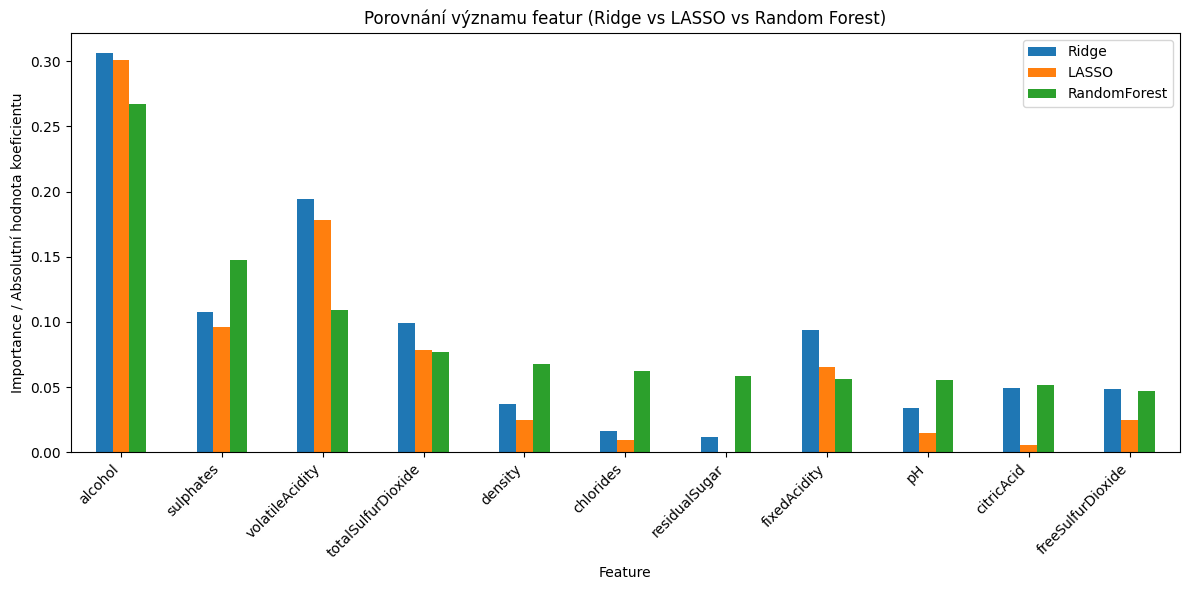

Top 5 nejdůležitějších featur napříč modely:
Feature
alcohol               0.291495
volatileAcidity       0.160662
sulphates             0.117118
totalSulfurDioxide    0.084797
fixedAcidity          0.071976
Name: MeanImportance, dtype: float64


In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# --- 2. Rozdělení vstupů a cíle ---
X = data.drop(columns=['quality'])
y = data['quality']

# --- 3. Standardizace ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Rozdělení dat na trénovací a testovací část ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- 5. Modely ---
ridge = Ridge(alpha=0.0, random_state=42)
lasso = Lasso(alpha=0.01, random_state=42)
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# --- 6. Trénink ---
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
rf.fit(X_train, y_train)

# --- 7. Získání "importance" ---
ridge_importance = np.abs(ridge.coef_)
lasso_importance = np.abs(lasso.coef_)
rf_importance = rf.feature_importances_

# --- 8. Vizuální srovnání ---
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Ridge': ridge_importance,
    'LASSO': lasso_importance,
    'RandomForest': rf_importance
}).set_index('Feature')

importance_df = importance_df.sort_values('RandomForest', ascending=False)



plt.figure(figsize=(10, 6))
importance_df.plot(kind='bar', figsize=(12,6))
plt.title('Porovnání významu featur (Ridge vs LASSO vs Random Forest)')
plt.ylabel('Importance / Absolutní hodnota koeficientu')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 9. Volitelně: vypsání top 5 featur podle průměrné importance ---
importance_df['MeanImportance'] = importance_df.mean(axis=1)
print("Top 5 nejdůležitějších featur napříč modely:")
print(importance_df['MeanImportance'].sort_values(ascending=False).head(5))




LASSO
alcohol               0.308054
volatileAcidity       0.181036
sulphates             0.094836
totalSulfurDioxide    0.078625
fixedAcidity          0.057526

RF
alcohol               0.270091
sulphates             0.147970
volatileAcidity       0.112703
totalSulfurDioxide    0.078205
chlorides             0.065450

Ridge
alcohol               0.316129
volatileAcidity       0.196771
sulphates             0.105396
totalSulfurDioxide    0.099119
fixedAcidity          0.085838

In [96]:
import numpy as np
import pandas as pd

# předpoklad: ridge, lasso, rf už natrénované; features = X.columns

ridge_imp = np.abs(ridge.coef_)
lasso_imp = np.abs(lasso.coef_)
rf_imp = rf.feature_importances_

# funkce pro bezpečnou normalizaci (pokud součet 0, necháme vektorem nul)
def safe_normalize(arr):
    s = np.sum(arr)
    if s == 0:
        return np.zeros_like(arr)
    return arr / s

ridge_norm = safe_normalize(ridge_imp)
lasso_norm = safe_normalize(lasso_imp)
rf_norm = safe_normalize(rf_imp)  # většinou už součet 1

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge': ridge_norm,
    'LASSO': lasso_norm,
    'RandomForest': rf_norm
}).set_index('Feature')

# procenta
importance_pct = importance_df * 100

# prumer přes metody (všechny metody stejnou vahou)
importance_pct['MeanPct'] = importance_pct.mean(axis=1)

# seřadit podle průměru
importance_pct = importance_pct.sort_values('MeanPct', ascending=False)

print(importance_pct)

                        Ridge      LASSO  RandomForest    MeanPct
Feature                                                          
alcohol             30.675811  37.669912     26.726744  31.690822
volatileAcidity     19.458564  22.335460     10.926388  17.573470
sulphates           10.756481  12.062917     14.758297  12.525898
totalSulfurDioxide   9.949898   9.788016      7.684203   9.140706
fixedAcidity         9.428847   8.230750      5.601854   7.753817
density              3.695602   3.084771      6.768479   4.516284
freeSulfurDioxide    4.840773   3.075642      4.725669   4.214028
citricAcid           4.936874   0.742160      5.161367   3.613467
pH                   3.412410   1.865765      5.535287   3.604487
chlorides            1.647085   1.144608      6.266800   3.019498
residualSugar        1.197656   0.000000      5.844911   2.347522
